# tSNE learning model for MNIST digits

Notebook conayins the code for a tSNE model and clustering for digit recognition. Model is designed to predict the MNIST digits data from the kaggle competition.

In [1]:
import time
from pathlib import Path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
#Set up dirs for project
base_dir= Path('/home/darren/Documents/DS/projects/MNIST_digit')
interim_data_dir= base_dir/'data'/'interim'

In [3]:
train_data= pd.read_csv(interim_data_dir/'train_data_std.csv', header= None)
train_data.shape[0]

42000

In [4]:
train_labels= pd.read_csv(interim_data_dir/'train_labels.csv', header= None, names= ['label'])
train_labels.head()

,label
0,1
1,0
2,1
3,4
4,0


In [5]:
labelled_data= pd.concat([train_labels, train_data], axis= 1)
labelled_data.shape

(42000, 785)

In [6]:
#set up random perm for testing
np.random.seed(23)
random_perm= np.random.permutation(labelled_data.shape[0])

In [7]:
#Select a perm sample
n= 10000
sub_train_data= labelled_data.iloc[random_perm[:n], :].copy()
print('Shape of data subset is: {}'.format(sub_train_data.shape))
sub_train_vals= sub_train_data.iloc[:, 1:].values

Shape of data subset is: (10000, 785)


In [8]:
sub_train_vals.shape

(10000, 784)

In [9]:
sub_train_data.head()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
4657,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24910,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33488,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25991,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33934,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
time_begin= time.time()
tsne= TSNE(n_components=2, verbose=1, perplexity=75, n_iter=500)
tsne_result= tsne.fit_transform(sub_train_vals)
print('tSNE completed! \nTime required {} seconds'.format(time.time()- time_begin))

[t-SNE] Computing 226 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.300s...
[t-SNE] Computed neighbors for 10000 samples in 122.331s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.355001
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.041542
[t-SNE] KL divergence after 500 iterations: 1.768324
tSNE completed! 
Time r

In [11]:
labels_df= sub_train_data.iloc[:, 0].values

In [12]:
tsne_df= pd.DataFrame(tsne_result, columns=['tSNE_1', 'tSNE_2'])
tsne_df['label']= labels_df
tsne_df.head()

,tSNE_1,tSNE_2,label
0,-1.225003,-6.714714,8
1,19.017344,-4.054096,1
2,2.811675,-26.692572,2
3,4.937270,-25.519648,2
4,13.398496,6.715549,4


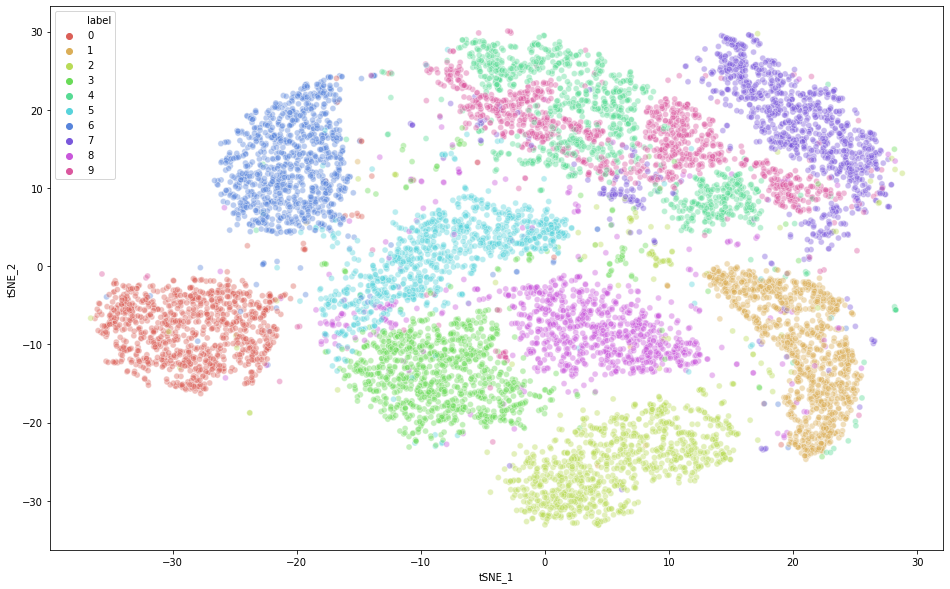

In [13]:
plt.figure(figsize=(16,10))
sns.scatterplot(x= 'tSNE_1', y='tSNE_2', data= tsne_df, hue= 'label', 
                palette=sns.color_palette("hls", 10), alpha= 0.4, legend= 'full')
plt.show()